## Predictive model to predict the participation count of breast cancer patients in NSW.

### Importing the packages.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor


### Loading dataset and displaying dataframe.

In [3]:
df = pd.read_csv("/Volumes/DriveB/Machine_Learning/Machine_Learning/Breast_Cancer_Participants.csv")
df

,State_and_territory,SA3_name,Year,Age_group,Participants
0,NSW,Queanbeyan,2018,50–54,1285
1,NSW,Queanbeyan,2018,55–59,1260
2,NSW,Queanbeyan,2018,60–64,1048
3,NSW,Queanbeyan,2018,65–69,855
4,NSW,Queanbeyan,2018,70–74,600
...,...,...,...,...,...
7051,NT,Katherine,2020,60–64,88
7052,NT,Katherine,2020,65–69,66
7053,NT,Katherine,2020,70–74,38
7054,NT,Katherine,2020,50–69,375


### Splitting features and target and further divide the data into training and test sets

In [4]:
X = df.drop(['Participants'], axis=1)
y = df['Participants']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Initializing Numeric and Categorical Transformers for Pipeline Integration
##### Using the SimpleImputer to fill missing values with the mean of the column for numerical column and most frequent value for categorical column. This ensures that no data is lost and the dataset remains complete.
#### Scaling the data to standardize features, which helps in reducing the impact of different scales and avoiding skewness. This process helps in speeding up gradient descent and improving model performance.
#### Applying one hot encoding on categorical data
#### preprocessing step for handling categorical features in a machine learning pipeline.

In [5]:
# Creating a list of categorical features.
categorical_features = ['State_and_territory','SA3_name','Year','Age_group']

#preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
   ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [6]:
# Create XGBoost pipeline
XGBR_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', XGBRegressor())])

# Fitting the pipeline to train model.
XGBR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['State_and_territory',
                                                   'SA3_name', 'Year',
                                                   'Age_group'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsampl...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

### Performing prediction on the train set and assessing the performance with the metrics.

In [7]:
y_pred_train = XGBR_pipeline.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
median_train = median_absolute_error(y_train, y_pred_train)

print("The score of mean absolute error on train set is:", mae_train)
print("The score of mean squared error on train set is:", mse_train)
print("The score of median absolute error on train set is:", median_train)

The score of mean absolute error on train set is: 541.3141655614409
The score of mean squared error on train set is: 645748.0555998841
The score of median absolute error on train set is: 279.44403076171875


#### Make predictions on the testing set and # evaluating the model

In [8]:
y_pred = XGBR_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
median = median_absolute_error(y_test, y_pred)

print("The score of mean absolute error on test set is:", mae)
print("The score of mean squared error on test set i:", mse)
print("The score of median absolute error on test set is:", median)


The score of mean absolute error on test set is: 583.5016543358648
The score of mean squared error on test set i: 830563.4985729925
The score of median absolute error on test set is: 292.5101013183594


### Analysing the insight gained from the predicted output and comparing it with actual data.

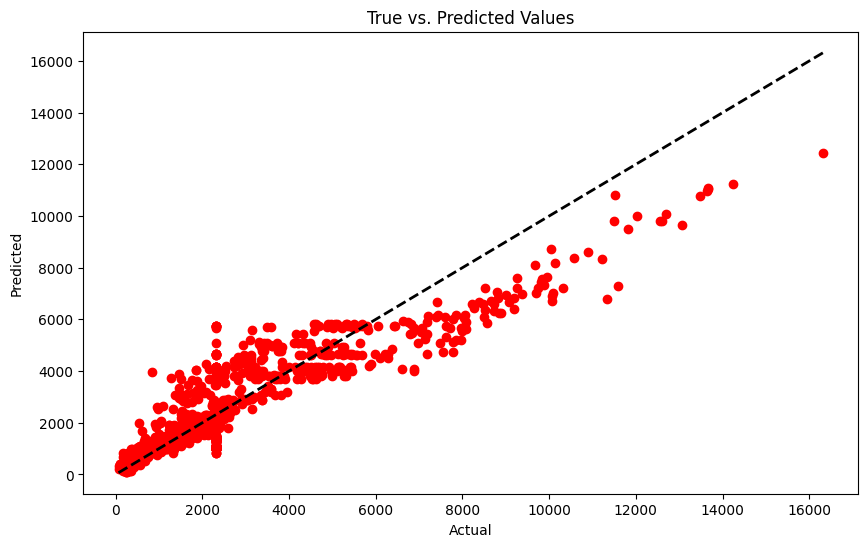

In [10]:
y_pred_best = XGBR_pipeline.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('True vs. Predicted Values')
plt.show()

#### Result: The model initially performed well, but over time the data became noisy, and outliers can also be seen in the prediction versus true value graph.

#### Saving the model into joblib, and this model is deployed on strimlit.

In [31]:
from joblib import dump
dump(XGBR_pipeline,  "/Volumes/DriveA/iLab_work/cervical_cancer/Breast_Cancer_Participants_XGBRegressor.joblib")

['/Volumes/DriveA/iLab_work/cervical_cancer/Breast_Cancer_Participants_XGBRegressor.joblib']

## EDA

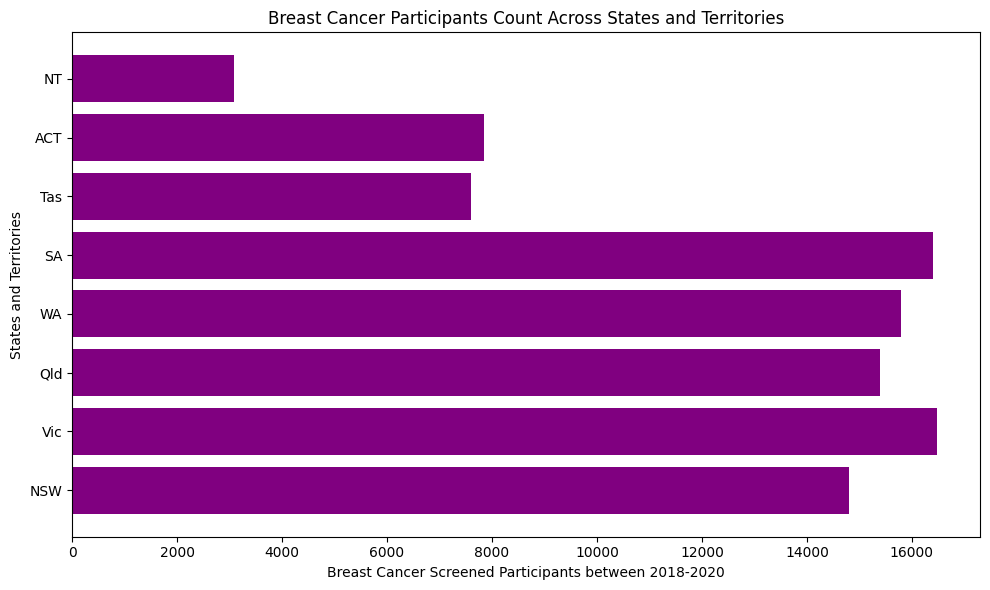

## Outcome of Prediction:
#### The score of mean absolute error on train set is: 541.3141655614409
#### The score of mean squared error on train set is: 645748.0555998841
#### The score of median absolute error on train set is: 279.44403076171875

#### The score of mean absolute error on test set is: 583.5016543358648
#### The score of mean squared error on test set i: 830563.4985729925
#### The score of median absolute error on test set is: 292.5101013183594

#### This predictive model cannot generalized the unseen data,  and model is underfitting.There more models are need to be built for testing.